In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def mask(column,threshold):
    counts = pd.value_counts(column)
    mask = column.isin(counts[counts > threshold].index)
    column[~mask] = "others"
    return column

In [3]:
acc_sample = pd.read_csv('1000-accounts.csv')
bookings_sample = pd.read_csv('1000-Bookings.csv')
products_sample = pd.read_csv('1000-Products.csv')
bookings_data = pd.read_csv('BookingsData.csv')
bookings_products = pd.read_csv('Bookings-Products.csv')

In [4]:
bookings_data = bookings_data.drop_duplicates()
bookings_data["Customer_Name"] = bookings_data["Customer_Name"].str.lower()
bookings_data["Product_Family"] = bookings_data["Product_Family"].str.lower()
bookings_data["BOARD_GEO"] = bookings_data["BOARD_GEO"].str.lower()
bookings_data["Customer_Name"] = bookings_data["Customer_Name"].replace('\s+', ' ', regex=True)
bookings_data["TX_Date_mod"] = pd.to_datetime(bookings_data['TX_Date'])
bookings_data = bookings_data[(bookings_data["TX_Date_mod"] > '2012')]

bookings_data.loc[(bookings_data['Product_Family'] == "lan desk (other)"),"Product_Family"] = 'others'
# bookings_data['Product_Family'] = mask(bookings_data['Product_Family'], 50)
# bookings_data['PRODUCTCODE'] = mask(bookings_data['PRODUCTCODE'], 20)
bookings_data.count()

Customer_Name      141799
Account_ID          14265
Bookings Amount    141799
TX_Date            141799
Seats              141799
GEO                 98553
BOARD_GEO          141799
VERTICAL           125251
Product_Family     141799
Deal Type          141799
Product Type       141799
Product Segment    135956
Contract Start     113938
Contract End        89477
PRODUCTCODE        141799
FAMILY             139802
NAME               141799
DESCRIPTION         87502
TX_Date_mod        141799
dtype: int64

In [5]:
company_standards = pd.read_csv('standardization2.csv')
company_standards_2 = pd.read_csv('standardization2_2.csv')
print(company_standards.shape)

bookings_data = bookings_data.merge(company_standards, left_on='Customer_Name', right_on='Similar_Name', how='outer')
bookings_data = bookings_data.rename(index=str, columns={"Customer_Name_x": "Customer_Name_old1", 
                                                         "Customer_Name_y": "Customer_Name"})

bookings_data = bookings_data.merge(company_standards_2, left_on='Customer_Name', right_on='Similar_Name', how='outer')
bookings_data = bookings_data.rename(index=str, columns={"Customer_Name_x": "Customer_Name_old2", 
                                                         "Customer_Name_y": "Customer_Name"})

bookings_data["Customer_Name"] = np.where(bookings_data.Customer_Name.isna(), 
                    np.where(bookings_data.Customer_Name_old2.isna(), bookings_data.Customer_Name_old1 , bookings_data.Customer_Name_old2),
                                       bookings_data.Customer_Name)   

print(len(bookings_data.Customer_Name.unique()))
print(len(bookings_data.Customer_Name_old2.unique()))
print(len(bookings_data.Customer_Name_old1.unique()))
print(bookings_data.shape)

(2572, 3)
21762
1308
23664
(149892, 25)


In [6]:
bookings_data["Seats"].describe()

count    1.498920e+05
mean     1.083895e+03
std      7.869290e+03
min     -1.250000e+05
25%      1.400000e+01
50%      1.000000e+02
75%      5.000000e+02
max      1.036000e+06
Name: Seats, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11c3033c8>]],
      dtype=object)

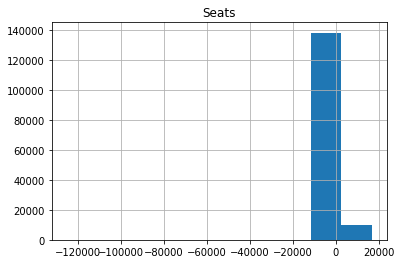

In [7]:
q = bookings_data["Seats"].quantile(0.99)
c = bookings_data[bookings_data["Seats"] < q]
#c.boxplot(column = "Seats")
c.hist(column = "Seats")

In [8]:
table = bookings_data.pivot_table(values=['Seats'], index=['Customer_Name'], columns=['Product_Family'],
                     aggfunc='sum').fillna(0)
table

Seats  \
Product_Family                                     anti virus   
Customer_Name                                                   
 interceramic                                             0.0   
 movitex                                               1920.0   
 oao bank petrocommerz                                    0.0   
##(##)############                                        0.0   
#eská lékárna a.s.                                        0.0   
's heeren loo                                             0.0   
't sit                                                    0.0   
(bet365) hillside (new media) ltd                         0.0   
(dhhs) us department of health &                          0.0   
(dhhs) us department of health & human services           0.0   
(fcos)                                                    0.0   
**radiant systems-do not use                          17969.0   
0                                                         0.0   
1-800 east west mortgage                                  0.0   
1-net singapore pte ltd                                   0.0   
102 israel fire and rescue service                        0.0   
1199nbf                                                   0.0   
1199seiu l benefit & pension f                            0.0   
121 financial credit union                                0.0   
1469-kona surf partners                                   0.0   
1st alliance lending                                      0.0   
1st alliance lending, llc                                 0.0   
1st global                                                0.0   
1st midamerica credit union                               0.0   
1st national bank of south florida                        0.0   
1st partners & co., inc.                                  0.0   
1st source bank                                           0.0   
1st united bank                                           0.0   
2 sisters food group                                      0.0   
20 minutes france sas                                  1080.0   
...                                                       ...   
zunhammer gmbh                                            0.0   
zurcher hichschuke fur angewandte                         0.0   
zurcher hichschuke fur angewandte wissens                 0.0   
zurich academy of applied sciences wissens                0.0   
zurich compania de seguros s.a.                           0.0   
zurich financial services (iom) gro                       0.0   
zurich financial services (iom) group                     0.0   
zurich financial services australia limited               0.0   
zurich hochschule der kuenste                             0.0   
zurich insurance                                          0.0   
zuwe hofpoort ziekenhuis                                  0.0   
zuyderland mc                                             0.0   
zuyderland medisch centrum                                0.0   
zv kommunale verkehrssicherheit                           0.0   
zv kommunale verkehrssicherheit obe                       0.0   
zv kommunale verkehrssicherheit oberland                  0.0   
zvei zentralverband elektrotechnik-und elektron...        0.0   
zweckverband abfallverwertung südostbayern                0.0   
zweckverband kommunale verkehrsüberwachung südo...        0.0   
zwembad de meerval                                        0.0   
zwick gmbh & co kg                                        0.0   
zwicker & associates                                   1940.0   
zwp ingenieur-ag                                          0.0   
zynga                                                     0.0   
zürcher kantonalbank (zkb)                                0.0   
öbb ikt gmbh                                              0.0   
östereichischer verband gemeinnütziger bauverei...        0.0   
österreich werbung                                        0.0   
österreichische präsidents

In [9]:
cor = table.corr()
#plt.matshow(table.corr())

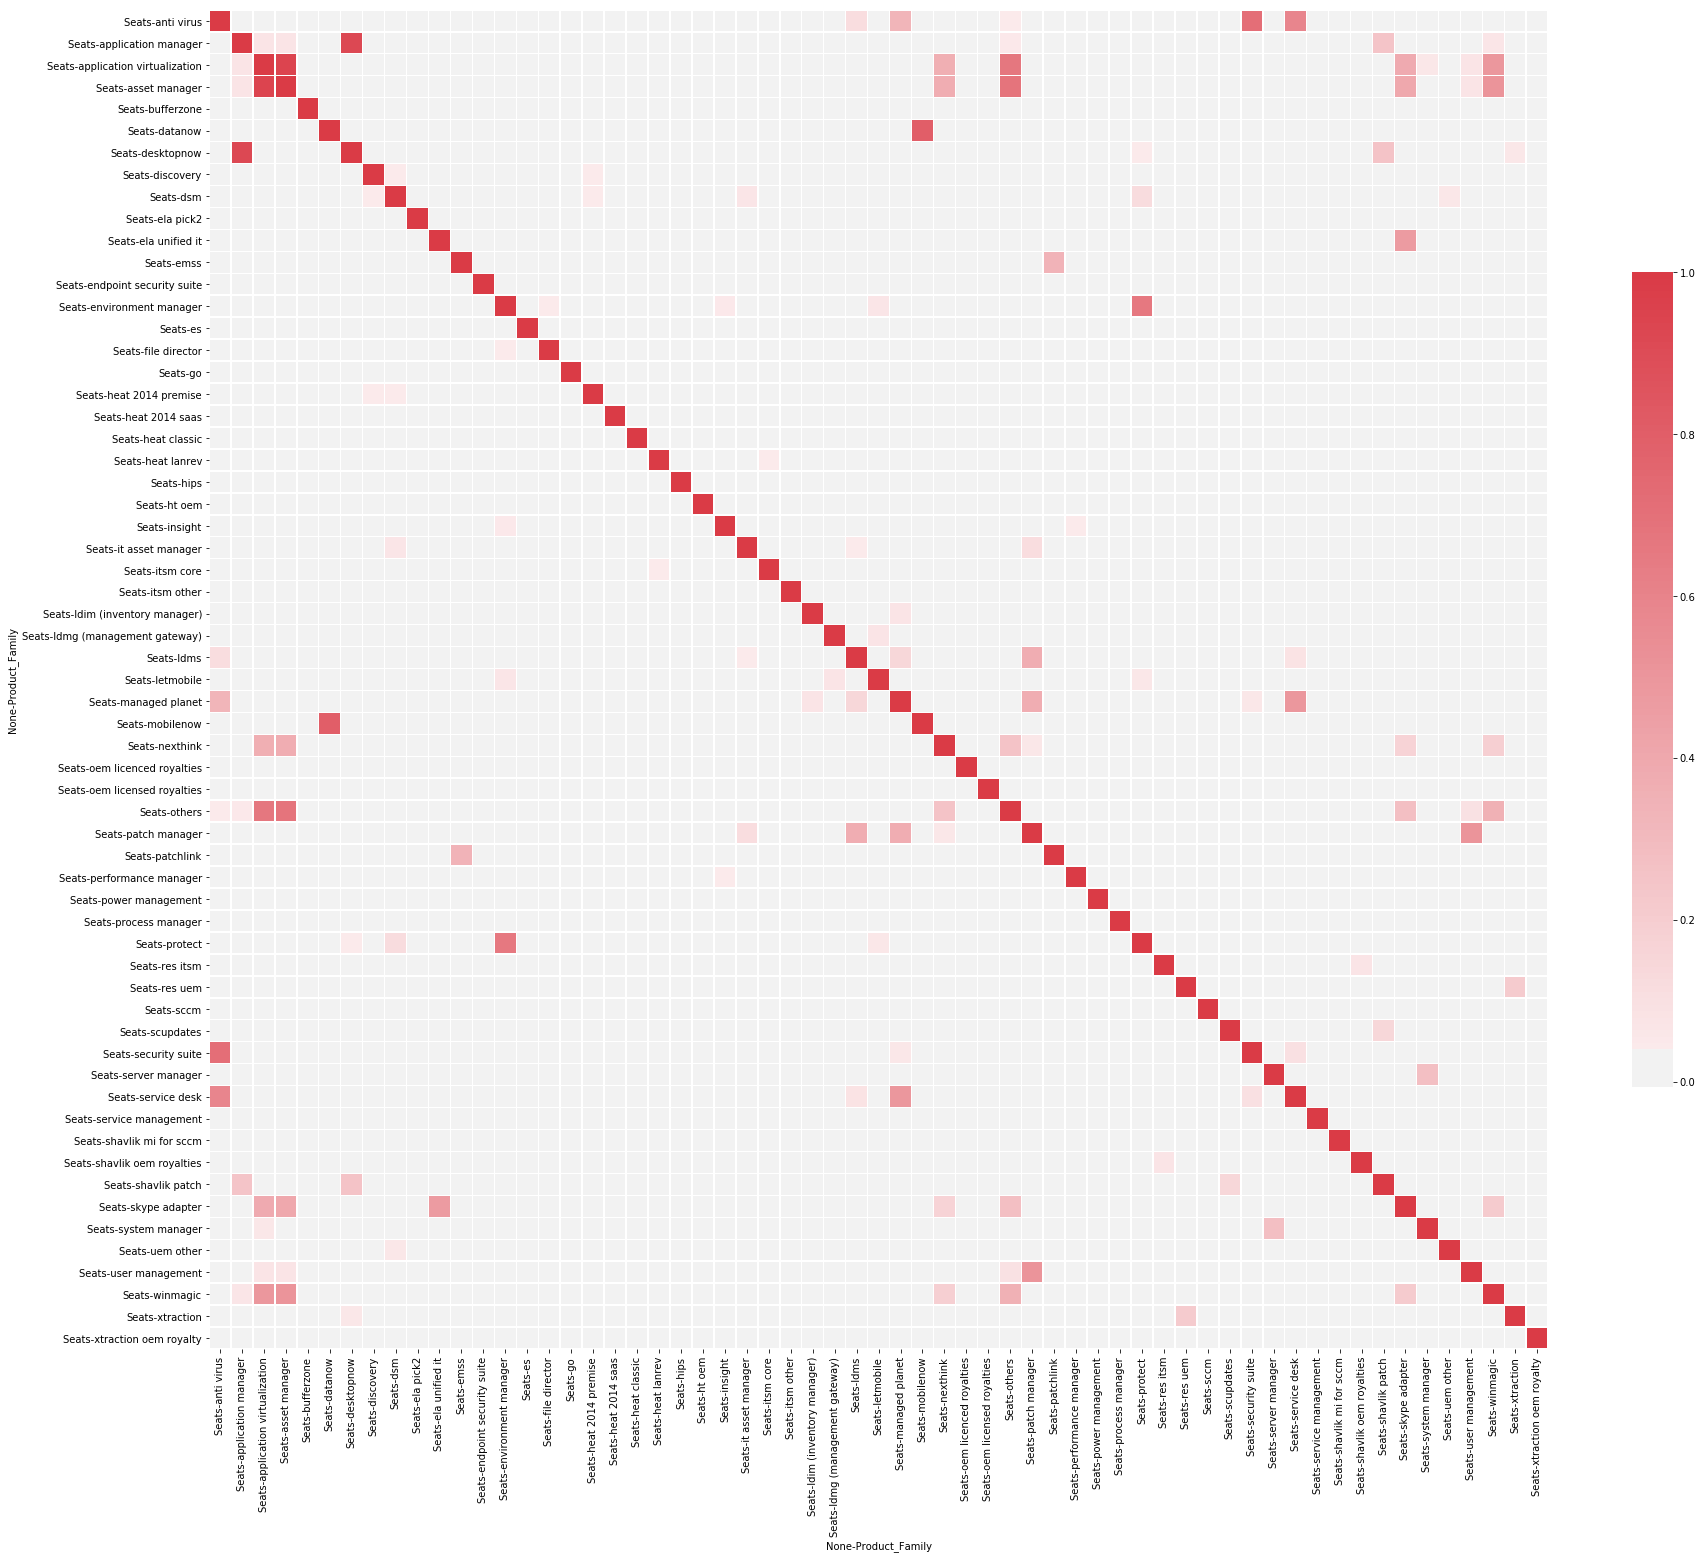

In [10]:
f, ax = plt.subplots(figsize=(30, 30))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(cor, cmap=cmap, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [11]:
indices = np.where(cor > 0.2)
indices = [(cor.index[x], cor.columns[y], cor[cor.index[x]][cor.columns[y]]) for x, y in zip(*indices)
                                        if x != y and x < y]
for i in indices:
    print(i)

(('Seats', 'anti virus'), ('Seats', 'managed planet'), 0.33076566460003276)
(('Seats', 'anti virus'), ('Seats', 'security suite'), 0.7163586293330798)
(('Seats', 'anti virus'), ('Seats', 'service desk'), 0.5881822574237064)
(('Seats', 'application manager'), ('Seats', 'desktopnow'), 0.9150073158389395)
(('Seats', 'application manager'), ('Seats', 'shavlik patch'), 0.24488560536719198)
(('Seats', 'application virtualization'), ('Seats', 'asset manager'), 0.9435543222304379)
(('Seats', 'application virtualization'), ('Seats', 'nexthink'), 0.3591575043432922)
(('Seats', 'application virtualization'), ('Seats', 'others'), 0.6661872959026681)
(('Seats', 'application virtualization'), ('Seats', 'skype adapter'), 0.386282579432299)
(('Seats', 'application virtualization'), ('Seats', 'winmagic'), 0.4929203031777205)
(('Seats', 'asset manager'), ('Seats', 'nexthink'), 0.3711993653385085)
(('Seats', 'asset manager'), ('Seats', 'others'), 0.6831863344503046)
(('Seats', 'asset manager'), ('Seats',

In [12]:
bookings_data['Seats_mod'] = np.where(bookings_data['Seats'] > 0, 1, 
                                 (np.where(bookings_data['Seats'] == 0, 0, -1)))
table1 = bookings_data.pivot_table(values=['Seats_mod'], index=['Customer_Name'], columns=['Product_Family'],
                     aggfunc='sum').fillna(0)
cor1 = table1.corr()

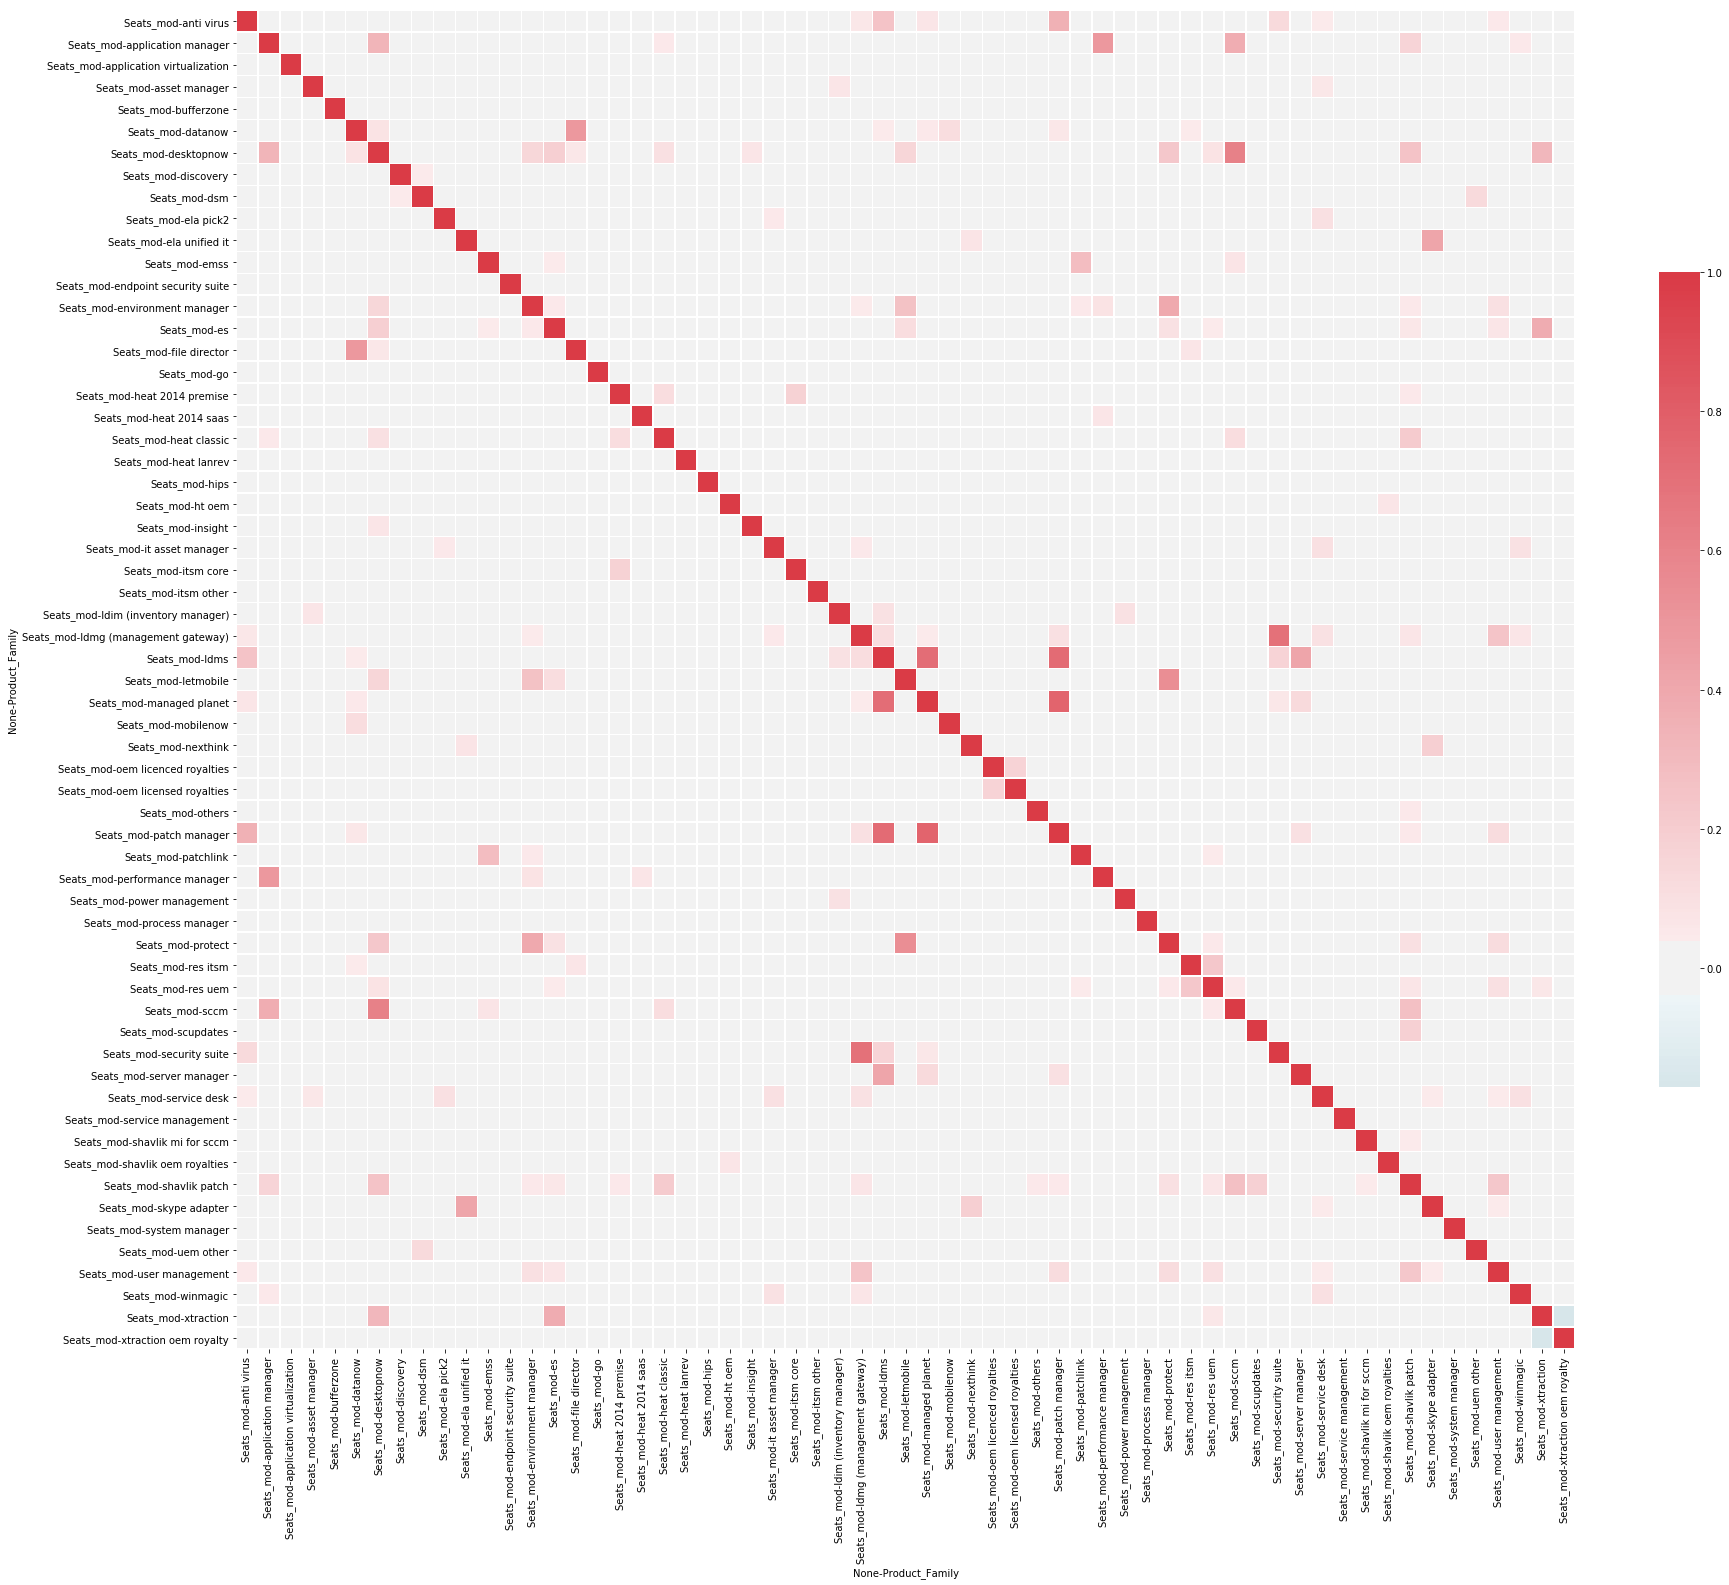

In [13]:
f, ax = plt.subplots(figsize=(30, 30))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(cor1, vmax=1, cmap = cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [14]:
indices = np.where(cor1 > 0.2)
indices = [(cor1.index[x], cor1.columns[y], cor1[cor1.index[x]][cor1.columns[y]]) for x, y in zip(*indices)
                                        if x != y and x < y]
for i in indices:
    print(i)

(('Seats_mod', 'anti virus'), ('Seats_mod', 'ldms'), 0.25162379124696477)
(('Seats_mod', 'anti virus'), ('Seats_mod', 'patch manager'), 0.3532774681021275)
(('Seats_mod', 'application manager'), ('Seats_mod', 'desktopnow'), 0.32806616937574823)
(('Seats_mod', 'application manager'), ('Seats_mod', 'performance manager'), 0.4905503024917888)
(('Seats_mod', 'application manager'), ('Seats_mod', 'sccm'), 0.3715667586372627)
(('Seats_mod', 'datanow'), ('Seats_mod', 'file director'), 0.4845056165328744)
(('Seats_mod', 'desktopnow'), ('Seats_mod', 'protect'), 0.23283127306810023)
(('Seats_mod', 'desktopnow'), ('Seats_mod', 'sccm'), 0.6121232213226032)
(('Seats_mod', 'desktopnow'), ('Seats_mod', 'shavlik patch'), 0.2538353415321088)
(('Seats_mod', 'desktopnow'), ('Seats_mod', 'xtraction'), 0.3168594679341332)
(('Seats_mod', 'ela unified it'), ('Seats_mod', 'skype adapter'), 0.41724322713174894)
(('Seats_mod', 'emss'), ('Seats_mod', 'patchlink'), 0.2825579205752223)
(('Seats_mod', 'environment 

In [18]:
a = bookings_data.Customer_Name.unique()
for i in a:
    print(i)
#     print("\n--------\n")

 interceramic
 movitex
 oao bank petrocommerz
büroring personalmanagement gmbh
##(##)############
#eská lékárna a.s.
's heeren loo
't sit
(bet365) hillside (new media) ltd
(dhhs) us department of health &
(dhhs) us department of health & human services
(fcos)
**radiant systems-do not use
???(??)??????faurecia (china)
?????????
??????????(??)????
???????hefei zhougudui daxing agricultural products international
?????tianjing jianfeng precious metals business co.,ltd
?ori martin s.p.a.
škoda js a.s.
0
1-800 east west mortgage
1-net singapore pte ltd
102 israel fire and rescue service
1199nbf
1199seiu l benefit & pension f
121 financial credit union
1469-kona surf partners
1st alliance lending
1st alliance lending, llc
1st global
1st midamerica credit union
1st national bank of south florida
1st partners & co., inc.
1st source bank
1st united bank
2 sisters food group
20 minutes france sas
21st century bank
21st century fox
21st century healthcare, inc.
21st century north america insuranc

carrosseriebouw roelofsen raalte bv
cars.com
carstar automotive inc
carta worldwide
cartal-rijsbergen automotive
carter bank and trust
carter conboy
carter-cash
carters, inc.
carthos services lp
cartus corporation
casa de s.m. el rey
casa grande union high school
casa sm rey
casa vinicola zonin spa
casacolumbia
casala meubelen nederland
casale s.a.
casaque anaik
cascade engineering
cascade microtech inc.
casestack, inc
casey family programs
casey's general stores, inc
cash converters
casino municipale di campione d'italia s.p.a
casino niagara
casl - university of maryland
cassa di risparmia di saluzzo spa
cassa di risparmio di fossano
cassa di risparmio di parma e piacenza spa
cassa lombarda s.p.a.
cassels brock & blackwell
cassidian test & services
cassidian communications inc
cast and crew
castle & cooke mortgage, llc
castle rock hospital district
castorama
catalyst corporate fcu
catamaran
catapult technology
catharina ziekenhuis eindhoven
cathay pacific
catholic church insurances li

electricity north west
electricity supply board
electricity supply board - ireland
electro cirkel bv
electro stokvis b.v.
electro-watt
electrolux - italy
electron energy corporation
electronic consulting services, inc (ecs) – federal
electronic documents centre
electronic merchants
electronic transaction consultants corporation
electronic warfare data support
electronic warfare data support wing
electronics for imaging inc
electronics y comunicaciones sa de cv
elekta, inc
elektra comercial
elektrik uretim as
elektrizitatswerk ewz
elektrizitätswerk ewz stadt zurich
elektrizitätswerk mittelbaden ag & co. kg
elektro eletricidade e servico
elematec co.,ltd.
element fleet
element materials technology
elementis global
elements.at new media solutions
elements.at new media solutions gmbh
eleos
eletrobras participacoes s/a eletropar
eleven biotherapeutics, inc.
elfac a/s
elgin st. thomas public health
elho
eli lilly federal credit union
elia
elig law office
elips life ag
elipslife ag
elisa oyj


harris corporation (gcsd) - fl
harris county hospital district
harris it services/us air force
harris teeter
harrison clark solicitors
harrison county hospital
harrisons llp
harrods ltd
harry and david
hart reade solicitors
hart systems inc.
harte-hanks shoppers
hartfiel automation
hartford healthcare
hartig drug
harvard business school
harvard fas computer services
harvard law school
harvard management co.
harvard medical school
harvard state bank
harvard university division continuing education
harvard university information tech
harvard university information technoloy
harvard university university software licensing
harvard university-faculty of arts
harvard vanguard medical associates
harvard vanguard medical associates/atrius health
harvey nichols
harwood state bank
hasco hasenclever gmbh + co kg
hassell services
hassia mineralquellen gmbh & co. kg
hastings college
hauck & aufhäuser privatbankiers kgaa
haufe-lexware gmbh & co. kg
hauraki council
haus der barmherzigkeit
hauser & w

lagardere services asia pacific
lagardere services hong kong
lagardere services singapore pte
lagardere services singapore pte ltd
lagardere services taiwan limited
lagardère travel retail france retail france
lagardere travel retail singapore pte ltd
lagardere- hachette filipacchi
lagrange school district 105
lahey clinic foundation, inc.
lahmeyer international gmbh
laing o'rourke
laiteries triballat rians
laity renewal foundation
lake area bank
lake avenue church
lake city bank - in
lake county clerk of courts
lake dillon fire district
lake health
lake michigan credit union
lake park high school
lake region manufacturing
lakeland medical center
lakeland regional medical center
lakeland regional medical cntr
lakin tire
lakota local school district
lam research
lambeth pct
lambweston meijer
lamco llc
lamda development - eur
lammico
lamoda
lamons gasket company
lamprell
lancashire constabulary hq
lancashire police
lancashire teaching hospitals
lancashire teaching nhs ft
lancaster genera

oerlikon it solutions ag, pfäf
oesterreichische beamtenversicherun
oesterreichische kontrollbank
off limits it services gmbh_commerz real ag
office connected llc
office de l'assurance invalidite
office depot france snc
office for national statistics
office national des forêts (onf france)
office of community investment and infrastructure
office of emergency management
office of enterprise technology state of minnesota
office of fair trading
office of financial research (dept. of treasury)
office of inspector general - us department of state
office of intelligence and counterintelligence (doe)
office of justice programs
office of nuclear energy
office of personnel management (omb)
office of scientific and technical
office of scientific and technical information (osti - doe)
office of the attorney general (ago)
office of the board of studies nsw
office of the chief financial offic
office of the chief financial officer
office of the chief information officer
office of the chief informatio

shenzhen airport co.,ltd.
shenzhen baoan international
shenzhen development bank
shenzhen dji technology
shenzhen environmental monitoring
shenzhen housing provident fund
shenzhen longgang shawan middle
shenzhen people’s hospital
shenzhen rapoo technology technologies co.,ltd
shenzhen rongtong capital management co.,ltd.
shenzhen second hospital
shenzhen sekorm advanced technologies co.,ltd
shenzhen shekou people’s hospital
shenzhen xinguodu technology co., ltd.
shepherd kaplan llc
shepherd neame ltd
sheppard mullin richter & hampton llp
shepway district council (62849)
sheraton gateway suites o'hare
sheraton maui hotel
sheraton paris airport hotel
sheraton stamford hotel
sherman & howard llc
sherman capital markets (formerly known as resurgent capital
sherman health systems
sherry fitzgerald group
shiel medical laboratory
shift 4
shima eiectronic industry
shimano czech republic s.r.o.
shimano europe holding bv
shimizu construction
shin-etsu handotai co., ltd.
shine ltd
ship smart inc


tribunal regional do trabalho 5a regiao
tribunal regional do trabalho 6a
tribunal regional do trabalho 6a regiao
tribunal regional do trabalho 7a
tribunal regional do trabalho 7a regiao
tribunal regional do trabalho 8a
tribunal regional do trabalho da 14
tribunal regional do trabalho da 14 regiao
tribunal regional do tralbaho da 9o
tribunal regional do tralbaho da 9o regi
tribunal superior do trabalho
trichter & murphy, pc
tricore solutions
trident systems inc.
triflor holding b.v.
trihealth information system
trihydro corporation
triland materials
triland metals limited (sh)
trillium gift of life network
trillium mutual insurance company
trillium property services limited
trimac transportation services
trinamo ag
trinisys
trinity christian academy
trinity church
trinity health-main
trinks gmbh
triodos bank nederland
trion (tm) a marsh & mclennan agency, llc company
trion group inc
triple canopy inc
triple canopy inc.
triple p nederland bv
tripnet ab
tripwire, inc.
triquint
triskalia
t

In [16]:
# sum(table1[('Seats_mod', 'deposit - ldms')])

0.0

In [17]:
# bookings_data[['Customer_Name','Bookings Amount','Seats','Seats_mod']][(bookings_data['Product_Family'] == "deposit - ldms")]

,Customer_Name,Bookings Amount,Seats,Seats_mod
52454,core corporation,206932.00,1,1
52456,core corporation,-206932.00,-1,-1
52458,core corporation,300258.96,33010000,1
52460,core corporation,-300258.96,-1,-1


In [32]:
a = bookings_data["Product_Family"].value_counts()
a[a>50]

protect                      2284
patch manager                1614
security suite               1300
desktopnow                    689
ldms                          334
emss                          319
xtraction                     298
res uem                       275
shavlik patch                 232
shavlik oem royalties         182
es                            166
heat 2014 saas                139
managed planet                138
application manager           115
dsm                           105
ldmg (management gateway)      89
ht oem                         83
service desk                   82
datanow                        80
environment manager            73
res itsm                       61
user management                58
heat 2014 premise              52
Name: Product_Family, dtype: int64

In [33]:
bookings_data.groupby(['Customer_Name','Product_Family'])['Seats'].sum()

Customer_Name     Product_Family           
a-katsastus       protect                        1600
acm               protect                         210
                  res uem                          65
american express  desktopnow                      100
                  heat classic                      5
                  ldmg (management gateway)         1
                  others                          175
                  user management                 400
                  winmagic                         35
amundi            ldms                           2100
                  patch manager                129450
                  user management               18000
axians            res itsm                       2685
                  xtraction                       264
baxter ag         it asset manager              35000
                  ldms                          53800
                  managed planet                53800
                  patch manager       

In [36]:
bookings_data.drop(['Account_ID','TX_Date','GEO','VERTICAL','Product Type', 'Product Segment','Contract Start'
                   ,'Contract End','FAMILY','Unnamed: 0_x','Similar_Name_x','Unnamed: 0_y','Similar_Name_y'],axis=1)

,Customer_Name_old1,Bookings Amount,Seats,BOARD_GEO,Product_Family,Deal Type,PRODUCTCODE,NAME,DESCRIPTION,TX_Date_mod,Customer_Name_old2,Customer_Name,Seats_mod
0,a-katsastus oy - helsinki,3002.98000,100,emea,protect,New,VP-ADV-SV-G-TLSS-C,Shavlik Protect Advanced for Server: Term Lice...,Minimum purchase quantity of 10. Technical sup...,2013-04-03 00:00:00,a-katsastus oy,a-katsastus,1
1,a-katsastus oy - helsinki,28915.66000,1500,emea,protect,New,VP-ADV-WS-G-TLSS-C,Shavlik Protect Advanced for Workstation: Term...,Minimum purchase quantity of 10. Technical sup...,2013-04-03 00:00:00,a-katsastus oy,a-katsastus,1
2,acm parts,594.18000,30,row,protect,New,S-STD-SV-P-TLSS-C,Ivanti Protect Standard for Server: Term Licen...,Minimum purchase quantity of 10. Technical sup...,2016-08-25 00:00:00,acm,acm,1
3,acm parts,1409.50000,150,row,protect,New,S-STD-WS-P-TLSS-C,Ivanti Protect/Empower Standard for Workstatio...,Minimum purchase quantity of 10. Technical sup...,2016-08-25 00:00:00,acm,acm,1
4,acm parts,614.67000,30,row,protect,Renewal,S-STDSVPTLSS-C-R,Ivanti Protect Standard for Server: Term Licen...,Minimum purchase quantity of 10. Technical sup...,2017-09-08 00:00:00,acm,acm,1
5,acm vastgoed management,6632.23275,65,emea,res uem,New,RESWSCLIC,Ivanti Workspace Control Silver - Concurrent U...,NaN,2014-05-30 12:00:00,acm,acm,1
6,american express arizona,5625.00000,100,americas,desktopnow,Volume,DSK LIC 00 F,"Ivanti DesktopNow - Named User License, powere...",Ivanti DesktopNow - Named User License,2017-12-15 00:00:00,american express,american express,1
7,american express publishing,5829.00000,5,americas,heat classic,Volume,HETCL0004,Ivanti HEAT Classic Perpetual License - Powere...,ONLY for Volume or Renewal,2013-01-17 00:00:00,american express,american express,1
8,financial express,66449.35000,350,emea,user management,New,LDTUM-L,"Total User Management Bundle Lic (USR), powere...",NaN,2013-09-27 00:00:00,american express,american express,1
9,financial express,-66449.35000,-350,emea,user management,New,LDTUM-L,"Total User Management Bundle Lic (USR), powere...",NaN,2013-09-30 00:00:00,american express,american express,-1


In [37]:
pd.concat([pd.crosstab(bookings_data['Deal Type'], bookings_data['BOARD_GEO'], margins=True), 
          pd.crosstab(bookings_data['Deal Type'], bookings_data['BOARD_GEO'], margins=True, normalize='index')*100], axis=1)

BOARD_GEO,americas,china,emea,japan,row,All,americas,china,emea,japan,row
Deal Type,,,,,,,,,,,
Migration,3,0,19,0,0,22,13.636364,0.000000,86.363636,0.000000,0.000000
New,813,48,1626,5,602,3094,26.276665,1.551390,52.553329,0.161603,19.457014
Renewal,873,56,1654,68,331,2982,29.275654,1.877934,55.466130,2.280349,11.099933
Volume,718,25,1746,7,441,2937,24.446714,0.851209,59.448417,0.238338,15.015322
All,2407,129,5045,80,1374,9035,26.640841,1.427781,55.838406,0.885445,15.207526


In [38]:
pd.crosstab(bookings_data['PRODUCTCODE'], bookings_data['Product_Family'], margins=True)

Product_Family,anti virus,application manager,application virtualization,asset manager,datanow,desktopnow,discovery,dsm,emss,environment manager,...,security suite,server manager,service desk,shavlik oem royalties,shavlik patch,uem other,user management,winmagic,xtraction,All
PRODUCTCODE,,,,,,,,,,,,,,,,,,,,,
55-CW-STAN-1YC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
ABMCL0001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
ACPCL0002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
AM LIC 00 F,0,75,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,75
AM LIC 00 T,0,40,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,40
AMDSV0001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
APCCL0001,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,2
APCCL0002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,33
APCCL0003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


(113, 2)